# 1) reading and loading the dataset

In [610]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
dataset=pd.read_csv(r"C:\Users\navee\Downloads\ds_salaries.csv")
dataset

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


# 2) exploratory data analysis

In [612]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


### a) drooping unnecessary columns

In [614]:
dataset.drop(columns=["salary_currency","salary_in_usd","employee_residence","remote_ratio","company_location","Unnamed: 0"],inplace=True)


In [615]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         607 non-null    int64 
 1   experience_level  607 non-null    object
 2   employment_type   607 non-null    object
 3   job_title         607 non-null    object
 4   salary            607 non-null    int64 
 5   company_size      607 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.6+ KB


### b) handling duplicate data

In [617]:
dataset.duplicated().sum()


70

In [618]:
dataset.shape

(607, 6)

In [619]:
dataset.drop_duplicates(inplace=True)
dataset

,work_year,experience_level,employment_type,job_title,salary,company_size
0,2020,MI,FT,Data Scientist,70000,L
1,2020,SE,FT,Machine Learning Scientist,260000,S
2,2020,SE,FT,Big Data Engineer,85000,M
3,2020,MI,FT,Product Data Analyst,20000,S
4,2020,SE,FT,Machine Learning Engineer,150000,L
...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,M
603,2022,SE,FT,Data Engineer,126000,M
604,2022,SE,FT,Data Analyst,129000,M
605,2022,SE,FT,Data Analyst,150000,M


In [620]:
encoded_data=dataset
encoded_data.head(5)

,work_year,experience_level,employment_type,job_title,salary,company_size
0,2020,MI,FT,Data Scientist,70000,L
1,2020,SE,FT,Machine Learning Scientist,260000,S
2,2020,SE,FT,Big Data Engineer,85000,M
3,2020,MI,FT,Product Data Analyst,20000,S
4,2020,SE,FT,Machine Learning Engineer,150000,L


In [621]:
encoded_data.shape

(537, 6)

### c)checking whether any null value is present or not in dataset

In [623]:
encoded_data.isnull().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
company_size        0
dtype: int64

In [624]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, 0 to 606
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         537 non-null    int64 
 1   experience_level  537 non-null    object
 2   employment_type   537 non-null    object
 3   job_title         537 non-null    object
 4   salary            537 non-null    int64 
 5   company_size      537 non-null    object
dtypes: int64(2), object(4)
memory usage: 29.4+ KB


<Axes: >

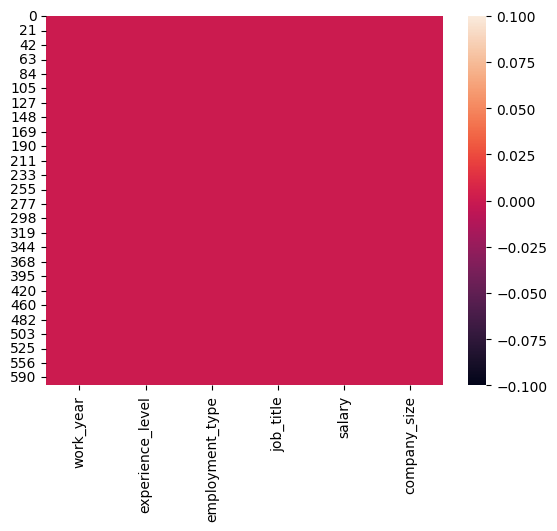

In [625]:
sns.heatmap(encoded_data.isnull())

### d) converting the categorical data into numerical data by one hot encoding

In [627]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, 0 to 606
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         537 non-null    int64 
 1   experience_level  537 non-null    object
 2   employment_type   537 non-null    object
 3   job_title         537 non-null    object
 4   salary            537 non-null    int64 
 5   company_size      537 non-null    object
dtypes: int64(2), object(4)
memory usage: 29.4+ KB


In [628]:
encoded_data["employment_type"].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [629]:
encoded_data["company_size"].unique()

array(['L', 'S', 'M'], dtype=object)

In [630]:
encoded_data["experience_level"].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [631]:
def map_job_group(title):
    title=title.lower()
    if "Scientist" in title:
        return 'Data Scientist'
    elif 'engineer' in title:
        return 'Data Engineer'
    elif 'architect' in title:
        return 'Architect'
    elif 'analyst' in title:
        return 'Analyst'
    elif 'manager' in title or 'lead' in title:
        return 'Manager'
    elif 'director' in title:
        return 'Director'
    elif 'developer' in title:
        return 'Developer'
    else:
        return 'Other'
encoded_data["job_group"]=dataset['job_title'].apply(map_job_group)
encoded_data["job_group"]

        

0              Other
1              Other
2      Data Engineer
3            Analyst
4      Data Engineer
           ...      
602    Data Engineer
603    Data Engineer
604          Analyst
605          Analyst
606            Other
Name: job_group, Length: 537, dtype: object

In [632]:
encoded_data.drop(columns="job_title",inplace=True)

In [633]:
encoded_data=pd.get_dummies(encoded_data,columns=["employment_type","company_size","experience_level","job_group"],dtype=int,drop_first=True)
encoded_data.head(5)

,work_year,salary,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,company_size_S,experience_level_EX,experience_level_MI,experience_level_SE,job_group_Architect,job_group_Data Engineer,job_group_Developer,job_group_Director,job_group_Manager,job_group_Other
0,2020,70000,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,2020,260000,0,1,0,0,1,0,0,1,0,0,0,0,0,1
2,2020,85000,0,1,0,1,0,0,0,1,0,1,0,0,0,0
3,2020,20000,0,1,0,0,1,0,1,0,0,0,0,0,0,0
4,2020,150000,0,1,0,0,0,0,0,1,0,1,0,0,0,0


In [634]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, 0 to 606
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   work_year                537 non-null    int64
 1   salary                   537 non-null    int64
 2   employment_type_FL       537 non-null    int32
 3   employment_type_FT       537 non-null    int32
 4   employment_type_PT       537 non-null    int32
 5   company_size_M           537 non-null    int32
 6   company_size_S           537 non-null    int32
 7   experience_level_EX      537 non-null    int32
 8   experience_level_MI      537 non-null    int32
 9   experience_level_SE      537 non-null    int32
 10  job_group_Architect      537 non-null    int32
 11  job_group_Data Engineer  537 non-null    int32
 12  job_group_Developer      537 non-null    int32
 13  job_group_Director       537 non-null    int32
 14  job_group_Manager        537 non-null    int32
 15  job_group_O

### e) removing outlier through IQR method

### i)detecting outlier

In [637]:
encoded_data.shape

(537, 16)

In [638]:
encoded_data.isnull().sum()

work_year                  0
salary                     0
employment_type_FL         0
employment_type_FT         0
employment_type_PT         0
company_size_M             0
company_size_S             0
experience_level_EX        0
experience_level_MI        0
experience_level_SE        0
job_group_Architect        0
job_group_Data Engineer    0
job_group_Developer        0
job_group_Director         0
job_group_Manager          0
job_group_Other            0
dtype: int64

In [639]:
encoded_data.describe()

,work_year,salary,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,company_size_S,experience_level_EX,experience_level_MI,experience_level_SE,job_group_Architect,job_group_Data Engineer,job_group_Developer,job_group_Director,job_group_Manager,job_group_Other
count,537.000000,5.370000e+02,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,2021.335196,3.510431e+05,0.007449,0.964618,0.018622,0.493482,0.150838,0.048417,0.355680,0.433892,0.022346,0.376164,0.007449,0.013035,0.044693,0.357542
std,0.701364,1.640061e+06,0.086065,0.184915,0.135312,0.500424,0.358225,0.214846,0.479165,0.496073,0.147945,0.484874,0.086065,0.113532,0.206821,0.479723
min,2020.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,7.000000e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021.000000,1.150000e+05,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2022.000000,1.654000e+05,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2022.000000,3.040000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\navee\AppData\Local\Temp\ipykernel_62908\2356903810.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(encoded_data["salary"])


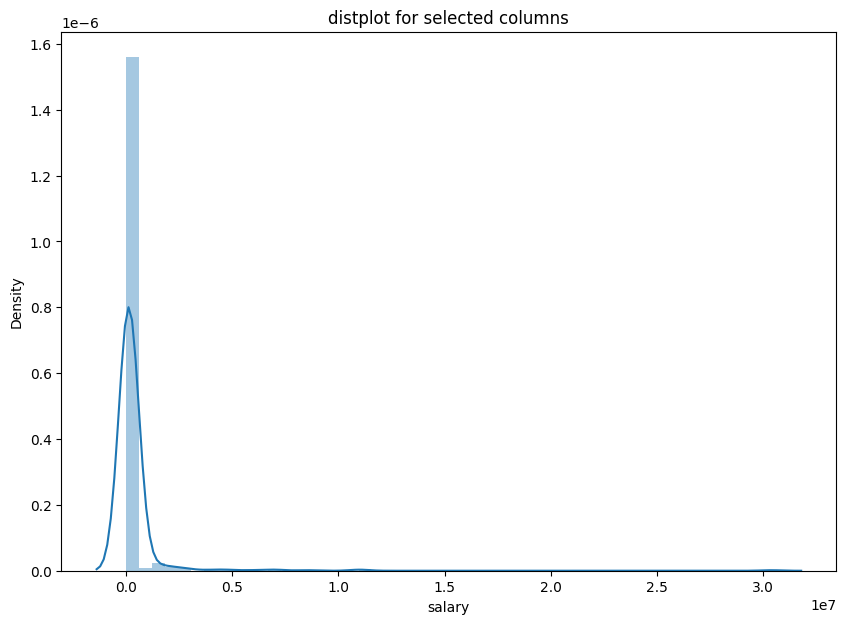

In [640]:
plt.figure(figsize=(10,7))
sns.distplot(encoded_data["salary"])
plt.title("distplot for selected columns")
plt.show()

### ii)removing outlier

In [642]:
selected_col=["salary"]
q1=encoded_data[selected_col].quantile(0.25)
q3=encoded_data[selected_col].quantile(0.75)
IQR=q3-q1
min_range=q1-(1.5*IQR)
max_range=q1+(1.5*IQR)
min_range,max_range



(salary   -73100.0
 dtype: float64,
 salary    213100.0
 dtype: float64)

In [643]:
mask=~((encoded_data[selected_col]<min_range)|(encoded_data[selected_col]>max_range)).any(axis=1)

In [644]:
cleaned_data=encoded_data.loc[mask]

C:\Users\navee\AppData\Local\Temp\ipykernel_62908\3002187612.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(encoded_data["salary"])
C:\Users\navee\AppData\Local\Temp\ipykernel_62908\3002187612.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data[selected_col],color="green")


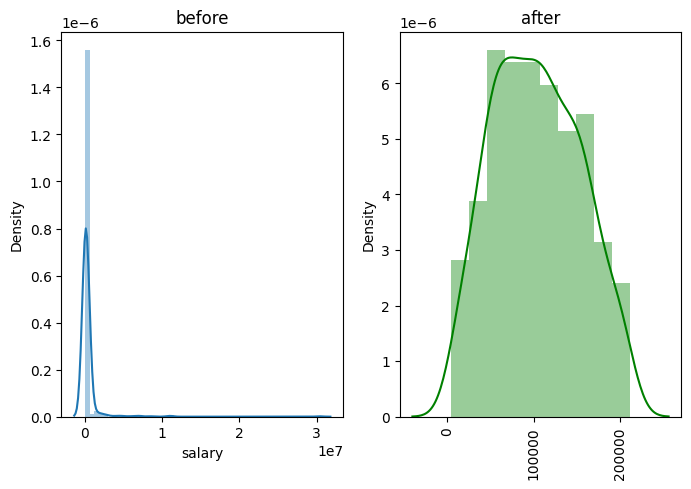

In [645]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.distplot(encoded_data["salary"])
plt.title("before")
plt.subplot(1,2,2)
sns.distplot(cleaned_data[selected_col],color="green")
plt.title("after")
plt.xticks(rotation=90)
plt.show()

# 3) function transformer

In [647]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 0 to 606
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   work_year                460 non-null    int64
 1   salary                   460 non-null    int64
 2   employment_type_FL       460 non-null    int32
 3   employment_type_FT       460 non-null    int32
 4   employment_type_PT       460 non-null    int32
 5   company_size_M           460 non-null    int32
 6   company_size_S           460 non-null    int32
 7   experience_level_EX      460 non-null    int32
 8   experience_level_MI      460 non-null    int32
 9   experience_level_SE      460 non-null    int32
 10  job_group_Architect      460 non-null    int32
 11  job_group_Data Engineer  460 non-null    int32
 12  job_group_Developer      460 non-null    int32
 13  job_group_Director       460 non-null    int32
 14  job_group_Manager        460 non-null    int32
 15  job_group_O

In [648]:
cleaned_data.shape

(460, 16)

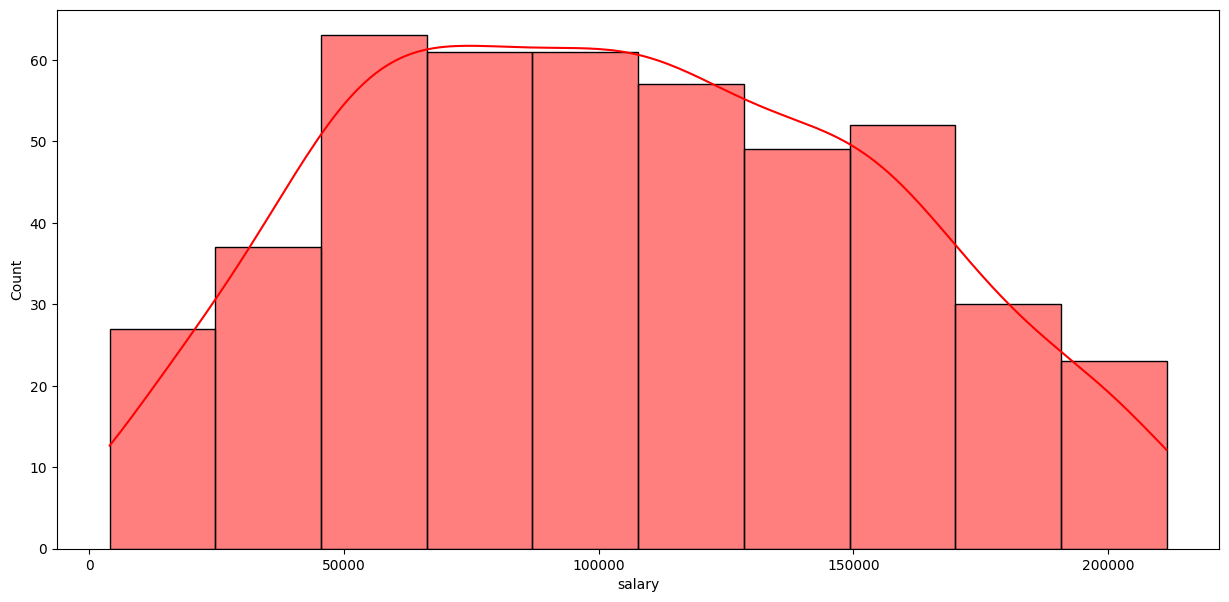

In [649]:
plt.figure(figsize=(15,7))
sns.histplot(x=cleaned_data["salary"],color="red",kde=True)
plt.show()

In [650]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np
ft=FunctionTransformer(func=np.log1p)
ft.fit(cleaned_data["salary"])
cleaned_data["salary_ft"]=ft.transform(cleaned_data["salary"])
cleaned_data


C:\Users\navee\AppData\Local\Temp\ipykernel_62908\224608925.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["salary_ft"]=ft.transform(cleaned_data["salary"])


,work_year,salary,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,company_size_S,experience_level_EX,experience_level_MI,experience_level_SE,job_group_Architect,job_group_Data Engineer,job_group_Developer,job_group_Director,job_group_Manager,job_group_Other,salary_ft
0,2020,70000,0,1,0,0,0,0,1,0,0,0,0,0,0,1,11.156265
2,2020,85000,0,1,0,1,0,0,0,1,0,1,0,0,0,0,11.350418
3,2020,20000,0,1,0,0,1,0,1,0,0,0,0,0,0,0,9.903538
4,2020,150000,0,1,0,0,0,0,0,1,0,1,0,0,0,0,11.918397
5,2020,72000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11.184435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,154000,0,1,0,1,0,0,0,1,0,1,0,0,0,0,11.944714
603,2022,126000,0,1,0,1,0,0,0,1,0,1,0,0,0,0,11.744045
604,2022,129000,0,1,0,1,0,0,0,1,0,0,0,0,0,0,11.767575
605,2022,150000,0,1,0,1,0,0,0,1,0,0,0,0,0,0,11.918397


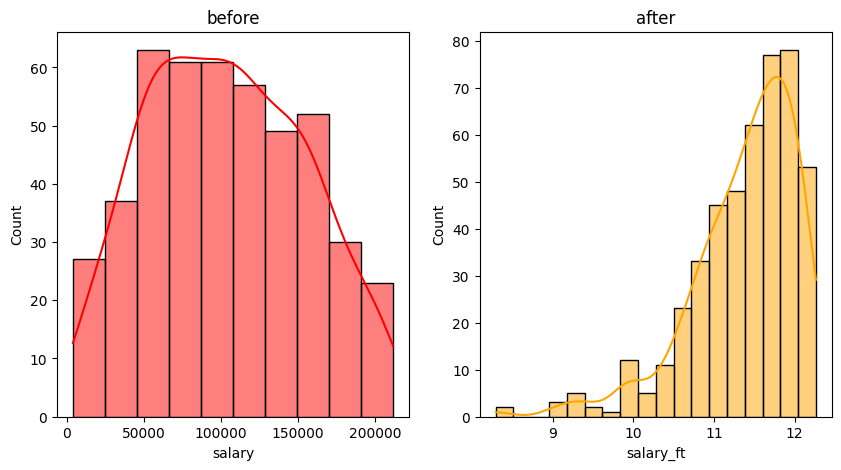

In [651]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(cleaned_data["salary"],color="red",kde=True)
plt.title("before")
plt.subplot(1,2,2)
sns.histplot(cleaned_data["salary_ft"],color="orange",kde=True)
plt.title("after")
plt.show()

# 4) feature scaling (standardization method)

In [653]:
cleaned_data.head(5)

,work_year,salary,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,company_size_S,experience_level_EX,experience_level_MI,experience_level_SE,job_group_Architect,job_group_Data Engineer,job_group_Developer,job_group_Director,job_group_Manager,job_group_Other,salary_ft
0,2020,70000,0,1,0,0,0,0,1,0,0,0,0,0,0,1,11.156265
2,2020,85000,0,1,0,1,0,0,0,1,0,1,0,0,0,0,11.350418
3,2020,20000,0,1,0,0,1,0,1,0,0,0,0,0,0,0,9.903538
4,2020,150000,0,1,0,0,0,0,0,1,0,1,0,0,0,0,11.918397
5,2020,72000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11.184435


In [654]:
cleaned_data.describe()

,work_year,salary,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,company_size_S,experience_level_EX,experience_level_MI,experience_level_SE,job_group_Architect,job_group_Data Engineer,job_group_Developer,job_group_Director,job_group_Manager,job_group_Other,salary_ft
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,2021.371739,103365.858696,0.008696,0.965217,0.019565,0.523913,0.147826,0.030435,0.360870,0.450000,0.021739,0.382609,0.008696,0.008696,0.039130,0.343478,11.377652
std,0.697697,50683.783024,0.092945,0.183428,0.138651,0.499972,0.355314,0.171967,0.480776,0.498035,0.145989,0.486553,0.092945,0.092945,0.194116,0.475386,0.663195
min,2020.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.294300
25%,2021.000000,60975.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.018193
50%,2021.000000,100000.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.512935
75%,2022.000000,144000.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,11.877576
max,2022.000000,211500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.261985


In [655]:
cleaned_data.shape

(460, 17)

In [656]:
cleaned_data.isnull().sum()

work_year                  0
salary                     0
employment_type_FL         0
employment_type_FT         0
employment_type_PT         0
company_size_M             0
company_size_S             0
experience_level_EX        0
experience_level_MI        0
experience_level_SE        0
job_group_Architect        0
job_group_Data Engineer    0
job_group_Developer        0
job_group_Director         0
job_group_Manager          0
job_group_Other            0
salary_ft                  0
dtype: int64

In [657]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, 0 to 606
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         537 non-null    int64 
 1   experience_level  537 non-null    object
 2   employment_type   537 non-null    object
 3   salary            537 non-null    int64 
 4   company_size      537 non-null    object
 5   job_group         537 non-null    object
dtypes: int64(2), object(4)
memory usage: 29.4+ KB


C:\Users\navee\AppData\Local\Temp\ipykernel_62908\2733495824.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data["salary_ft"])


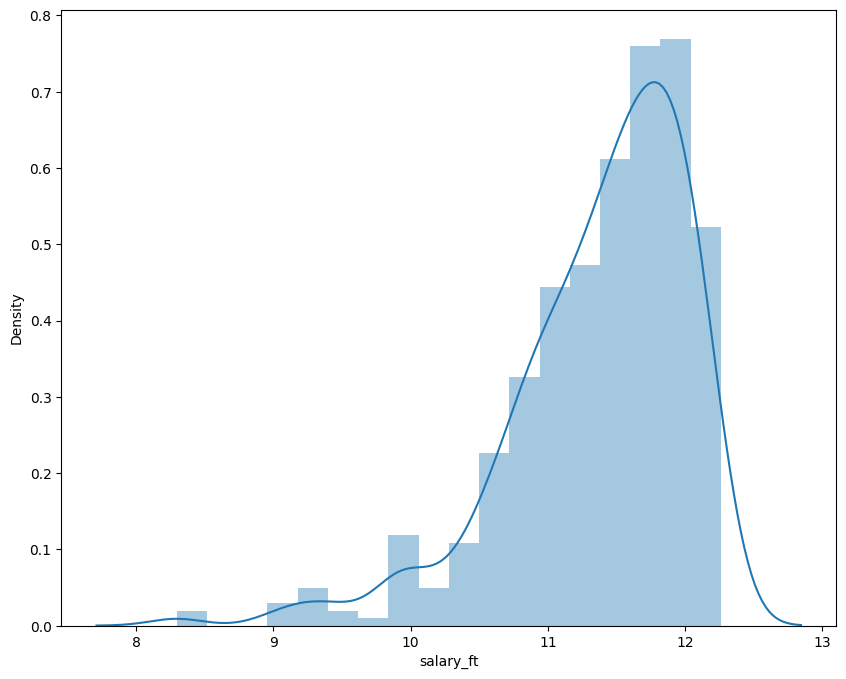

In [658]:
plt.figure(figsize=(10,8))
sns.distplot(cleaned_data["salary_ft"])
plt.show()

In [659]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(cleaned_data[["salary_ft"]])
#ss.transform(dataset[["ApplicantIncome"]]),columns=["X"]
cleaned_data["salary_ss"]=ss.fit_transform(cleaned_data[["salary_ft"]])
cleaned_data.head(10)




C:\Users\navee\AppData\Local\Temp\ipykernel_62908\3527831495.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["salary_ss"]=ss.fit_transform(cleaned_data[["salary_ft"]])


,work_year,salary,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,company_size_S,experience_level_EX,experience_level_MI,experience_level_SE,job_group_Architect,job_group_Data Engineer,job_group_Developer,job_group_Director,job_group_Manager,job_group_Other,salary_ft,salary_ss
0,2020,70000,0,1,0,0,0,0,1,0,0,0,0,0,0,1,11.156265,-0.334182
2,2020,85000,0,1,0,1,0,0,0,1,0,1,0,0,0,0,11.350418,-0.041109
3,2020,20000,0,1,0,0,1,0,1,0,0,0,0,0,0,0,9.903538,-2.225165
4,2020,150000,0,1,0,0,0,0,0,1,0,1,0,0,0,0,11.918397,0.816251
5,2020,72000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11.184435,-0.291659
6,2020,190000,0,1,0,0,1,0,0,1,0,0,0,0,1,0,12.154785,1.173076
8,2020,135000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,11.813037,0.657211
9,2020,125000,0,1,0,0,1,0,0,1,0,1,0,0,0,0,11.736077,0.541040
10,2020,45000,0,1,0,0,1,0,0,0,0,0,0,0,0,1,10.714440,-1.001114
12,2020,35000,0,1,0,1,0,0,0,0,0,0,0,0,0,1,10.463132,-1.380461


C:\Users\navee\AppData\Local\Temp\ipykernel_62908\2822938529.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data["salary_ft"])
C:\Users\navee\AppData\Local\Temp\ipykernel_62908\2822938529.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data["salary_ss"],color="orange")


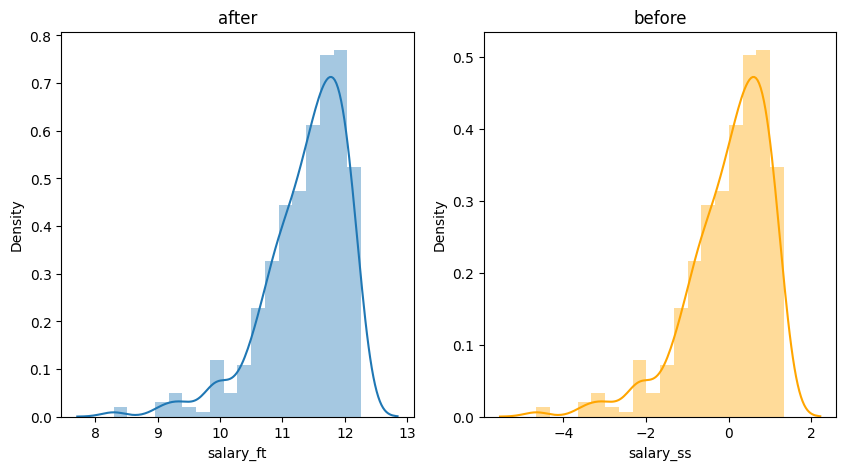

In [660]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(cleaned_data["salary_ft"])
plt.title("after")
plt.subplot(1,2,2)
sns.distplot(cleaned_data["salary_ss"],color="orange")
plt.title("before")
plt.show()

In [661]:
cleaned_data.columns

Index(['work_year', 'salary', 'employment_type_FL', 'employment_type_FT',
       'employment_type_PT', 'company_size_M', 'company_size_S',
       'experience_level_EX', 'experience_level_MI', 'experience_level_SE',
       'job_group_Architect', 'job_group_Data Engineer', 'job_group_Developer',
       'job_group_Director', 'job_group_Manager', 'job_group_Other',
       'salary_ft', 'salary_ss'],
      dtype='object')

In [662]:
cleaned_data.describe()

,work_year,salary,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,company_size_S,experience_level_EX,experience_level_MI,experience_level_SE,job_group_Architect,job_group_Data Engineer,job_group_Developer,job_group_Director,job_group_Manager,job_group_Other,salary_ft,salary_ss
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,4.600000e+02
mean,2021.371739,103365.858696,0.008696,0.965217,0.019565,0.523913,0.147826,0.030435,0.360870,0.450000,0.021739,0.382609,0.008696,0.008696,0.039130,0.343478,11.377652,2.131628e-15
std,0.697697,50683.783024,0.092945,0.183428,0.138651,0.499972,0.355314,0.171967,0.480776,0.498035,0.145989,0.486553,0.092945,0.092945,0.194116,0.475386,0.663195,1.001089e+00
min,2020.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.294300,-4.654298e+00
25%,2021.000000,60975.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.018193,-5.426010e-01
50%,2021.000000,100000.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.512935,2.042096e-01
75%,2022.000000,144000.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,11.877576,7.546312e-01
max,2022.000000,211500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.261985,1.334895e+00


In [663]:
cleaned_data.isnull().sum()

work_year                  0
salary                     0
employment_type_FL         0
employment_type_FT         0
employment_type_PT         0
company_size_M             0
company_size_S             0
experience_level_EX        0
experience_level_MI        0
experience_level_SE        0
job_group_Architect        0
job_group_Data Engineer    0
job_group_Developer        0
job_group_Director         0
job_group_Manager          0
job_group_Other            0
salary_ft                  0
salary_ss                  0
dtype: int64

In [664]:
cleaned_data["salary"].dtype

dtype('int64')

# 5)Correlation

### checking correlation of column salary_ss with other columns

In [667]:
cleaned_data.shape

(460, 18)

In [668]:
cleaned_data.columns

Index(['work_year', 'salary', 'employment_type_FL', 'employment_type_FT',
       'employment_type_PT', 'company_size_M', 'company_size_S',
       'experience_level_EX', 'experience_level_MI', 'experience_level_SE',
       'job_group_Architect', 'job_group_Data Engineer', 'job_group_Developer',
       'job_group_Director', 'job_group_Manager', 'job_group_Other',
       'salary_ft', 'salary_ss'],
      dtype='object')

In [669]:
cleaned_data["work_year"].unique()

array([2020, 2021, 2022], dtype=int64)

In [670]:
cleaned_data.isnull().sum()

work_year                  0
salary                     0
employment_type_FL         0
employment_type_FT         0
employment_type_PT         0
company_size_M             0
company_size_S             0
experience_level_EX        0
experience_level_MI        0
experience_level_SE        0
job_group_Architect        0
job_group_Data Engineer    0
job_group_Developer        0
job_group_Director         0
job_group_Manager          0
job_group_Other            0
salary_ft                  0
salary_ss                  0
dtype: int64

In [671]:
numeric_data=cleaned_data.select_dtypes(include='number')

In [672]:
correlations=numeric_data.corr()['salary_ss'].drop('salary_ss')
sorted_corr=correlations.sort_values(ascending=False)
print(sorted_corr)

salary_ft                  1.000000
salary                     0.920460
experience_level_SE        0.429240
work_year                  0.261032
employment_type_FT         0.254311
job_group_Manager          0.151447
company_size_M             0.132932
job_group_Architect        0.130720
experience_level_EX        0.088382
job_group_Director         0.056548
job_group_Developer       -0.005372
job_group_Data Engineer   -0.019224
job_group_Other           -0.037436
employment_type_FL        -0.130748
experience_level_MI       -0.191408
company_size_S            -0.217758
employment_type_PT        -0.230236
Name: salary_ss, dtype: float64


C:\Users\navee\AppData\Local\Temp\ipykernel_62908\2700560156.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_corr.values,y=sorted_corr.index,palette="prism")


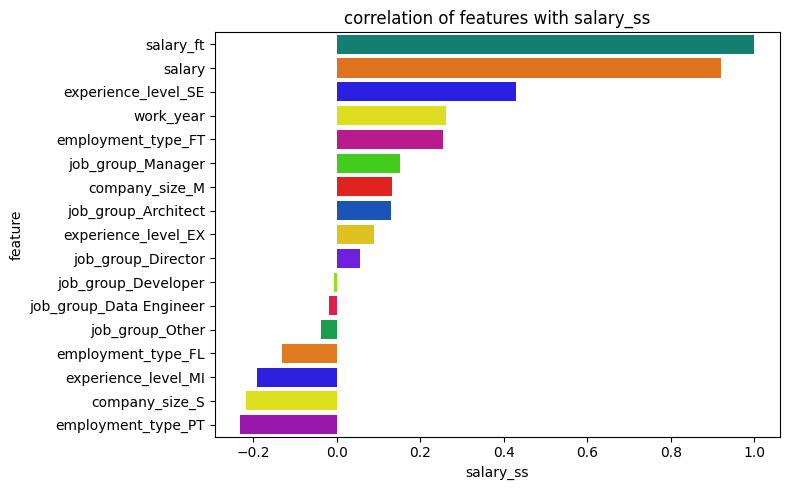

In [673]:
plt.figure(figsize=(8,5))
sns.barplot(x=sorted_corr.values,y=sorted_corr.index,palette="prism")
plt.title("correlation of features with salary_ss")
plt.xlabel("salary_ss")
plt.ylabel("feature")
plt.tight_layout()
plt.show()

In [674]:
cleaned_data.drop(columns=["salary_ft","salary"],inplace=True)

C:\Users\navee\AppData\Local\Temp\ipykernel_62908\4064658161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.drop(columns=["salary_ft","salary"],inplace=True)


In [675]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 0 to 606
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   work_year                460 non-null    int64  
 1   employment_type_FL       460 non-null    int32  
 2   employment_type_FT       460 non-null    int32  
 3   employment_type_PT       460 non-null    int32  
 4   company_size_M           460 non-null    int32  
 5   company_size_S           460 non-null    int32  
 6   experience_level_EX      460 non-null    int32  
 7   experience_level_MI      460 non-null    int32  
 8   experience_level_SE      460 non-null    int32  
 9   job_group_Architect      460 non-null    int32  
 10  job_group_Data Engineer  460 non-null    int32  
 11  job_group_Developer      460 non-null    int32  
 12  job_group_Director       460 non-null    int32  
 13  job_group_Manager        460 non-null    int32  
 14  job_group_Other          460 no

# 6) Model Building

In [677]:
from sklearn.model_selection import GridSearchCV

In [678]:
from sklearn.linear_model import Ridge

In [679]:
from sklearn.metrics import r2_score

In [680]:
from sklearn.linear_model import LinearRegression

In [681]:
from xgboost import XGBRegressor

# 7) Model training and testing

In [683]:
from sklearn.model_selection import train_test_split

In [684]:
from sklearn.preprocessing import StandardScaler

In [685]:
from sklearn.pipeline import Pipeline

In [686]:
x=cleaned_data.iloc[:,:-1]
y=cleaned_data["salary_ss"]

In [687]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

### by muliple linear regression algorithm

In [689]:
lr_pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('lr',LinearRegression())
])
lr_pipeline.fit(x_train,y_train)#training
y_pred_lr=lr_pipeline.predict(x_test)#testing


In [690]:
lr_pipeline.fit(x_train,y_train)

,steps,"[('scaler', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


# 8) Model evaluation

In [692]:
y_pred_lr=lr_pipeline.predict(x_test)
r2_score(y_test,y_pred_lr)#model evaluation

0.3798651689772221

# 9) model training,testing and evaluation by Ridge Regression algorithm

In [694]:
ridge_pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('ridge',Ridge())
])

In [695]:
param_grid={
    'ridge__alpha':[0.01,0.1,10.0]
}

In [696]:
grid_search=GridSearchCV(ridge_pipeline,param_grid,scoring='r2',cv=5)


In [697]:
grid_search.fit(x_train,y_train)#training


,estimator,"Pipeline(step...e', Ridge())])"
,param_grid,"{'ridge__alpha': [0.01, 0.1, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [698]:
y_pred_ridge=grid_search.predict(x_test)#tetsing

In [699]:
r2_score(y_test,y_pred_ridge)#model evaluation


0.37278523330504165

# 10) comparison b/w algorithms by line plot

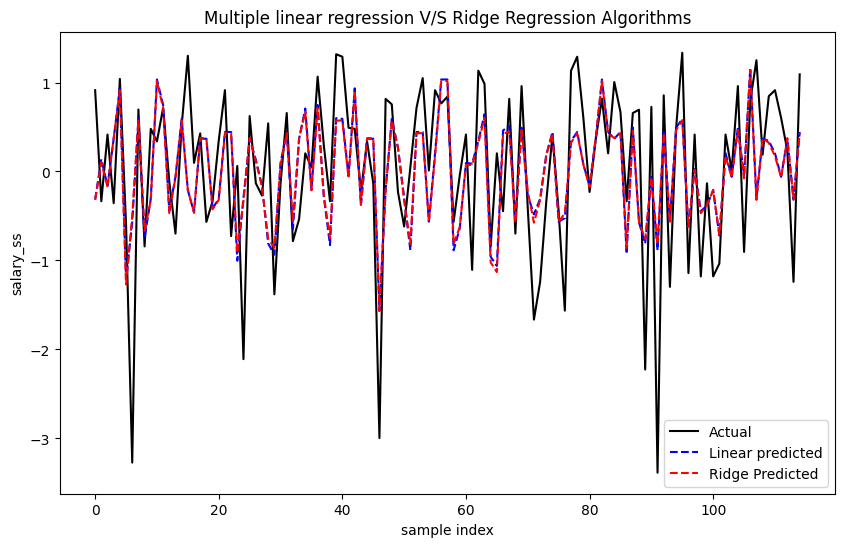

In [701]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(y_test.values,label='Actual',color='black')
plt.plot(y_pred_lr,label='Linear predicted',linestyle='--',color='blue')
plt.plot(y_pred_ridge,label='Ridge Predicted',linestyle='--',color='red')
plt.title('Multiple linear regression V/S Ridge Regression Algorithms')
plt.xlabel("sample index")
plt.ylabel("salary_ss")
plt.legend()
plt.show()

# 11)saving a model and preprocessing tools

In [703]:
import pandas as pd

In [704]:
import numpy as np

In [705]:
import joblib

In [706]:
joblib.dump(grid_search,'linear_model.pkl')

['linear_model.pkl']

In [707]:
salary_scaler=StandardScaler()
salary_scaler.fit(dataset[['salary']])


,copy,True
,with_mean,True
,with_std,True


In [708]:
joblib.dump(salary_scaler,'salary_scaler.pkl')

['salary_scaler.pkl']

In [709]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 0 to 606
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   work_year                460 non-null    int64  
 1   employment_type_FL       460 non-null    int32  
 2   employment_type_FT       460 non-null    int32  
 3   employment_type_PT       460 non-null    int32  
 4   company_size_M           460 non-null    int32  
 5   company_size_S           460 non-null    int32  
 6   experience_level_EX      460 non-null    int32  
 7   experience_level_MI      460 non-null    int32  
 8   experience_level_SE      460 non-null    int32  
 9   job_group_Architect      460 non-null    int32  
 10  job_group_Data Engineer  460 non-null    int32  
 11  job_group_Developer      460 non-null    int32  
 12  job_group_Director       460 non-null    int32  
 13  job_group_Manager        460 non-null    int32  
 14  job_group_Other          460 no

# 12)loading the model and preprocessing tools

In [711]:
grid_search=joblib.load('linear_model.pkl')

In [712]:
salary_scaler=joblib.load('salary_scaler.pkl')

In [713]:
employee_data=pd.DataFrame({
    'company_size':['M','S'],
    'experience_level':['EX','MI'],
    'employment_type':['FL','FT'],
    'job_group':['Data Engineer','Developer'],
    'work_year':[2020,2022]    
})

In [714]:
employee_data_encoded=pd.get_dummies(employee_data)

In [715]:
employee_data_encoded=employee_data_encoded.reindex(columns=cleaned_data.columns.drop('salary_ss'),fill_value=0)

In [716]:
predicted_salary=grid_search.predict(employee_data_encoded)

In [717]:
predicted_salary

array([-1.21280544,  0.02123225])

##### covert to origianl_salary

In [719]:
original_salary=salary_scaler.inverse_transform(predicted_salary.reshape(-1,1))
original_salary

array([[-1636178.77990245],
       [  385832.80104219]])

In [720]:
print(f"predicted salary is: ${original_salary}")

predicted salary is: $[[-1636178.77990245]
 [  385832.80104219]]
